In [1]:
import matplotlib.pyplot as plt
import cv2
import png
import os
import numpy as np

%matplotlib inline

In [2]:
def read_img(path, height=28, width=28):
    height = 28
    width = 28
    list_dir = os.listdir(path)
    print("reading data from {}".format(path))
    data_size = len(list_dir)
    print("data size:", data_size)
    res = np.zeros((data_size, height, width))
    for i in range(data_size):
        img_path = path + "/" + str(i) + ".png"
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        res[i, :, :] = img
        if i%10000 == 9999:
            print("currently at line {}".format(i+1))
    return res
    
def read_label(path):
    return np.loadtxt(path, dtype=np.int16)

In [3]:
train_path = "/home/anhns3/Desktop/deeplearning.ai-notes-master/mnist/train/"
test_path = "/home/anhns3/Desktop/deeplearning.ai-notes-master/mnist/test/"
train_labels = "/home/anhns3/Desktop/deeplearning.ai-notes-master/mnist/train_labels"
test_labels = "/home/anhns3/Desktop/deeplearning.ai-notes-master/mnist/test_labels"

x_train = read_img(train_path)
x_test = read_img(test_path)
y_train = read_label(train_labels)
y_test = read_label(test_labels)

reading data from /home/anhns3/Desktop/deeplearning.ai-notes-master/mnist/train/
data size: 60000
currently at line 10000
currently at line 20000
currently at line 30000
currently at line 40000
currently at line 50000
currently at line 60000
reading data from /home/anhns3/Desktop/deeplearning.ai-notes-master/mnist/test/
data size: 10000
currently at line 10000


In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

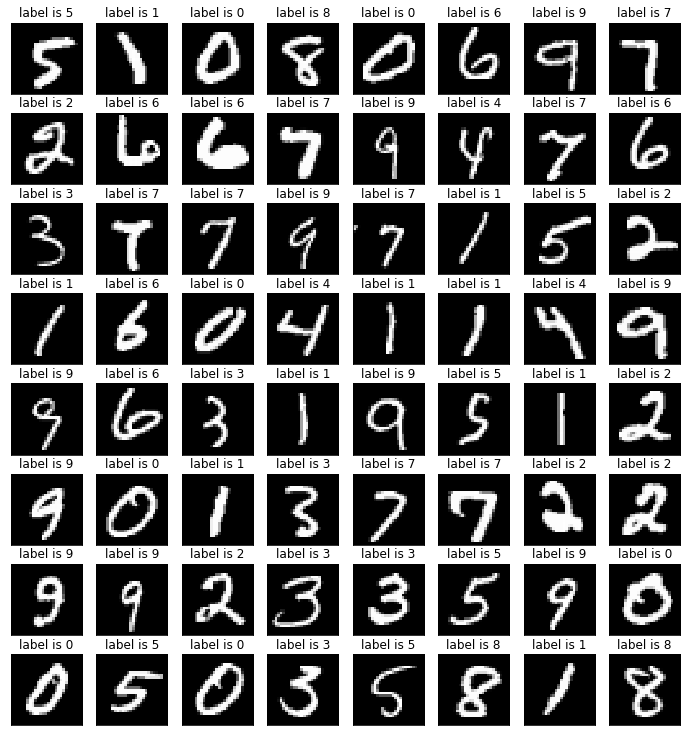

In [7]:
# showing sample of images
rd_idx = np.random.randint(0, 60000, 64)
sample = [x_train[i, :, :] for i in rd_idx]
sample_labels = [y_train[i] for i in rd_idx]
plt.figure(figsize=(12, 13))
ix = 1
for _ in range(8):
    for _ in range(8):
        # specify subplot and turn of axis
        ax = plt.subplot(8, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(sample[ix-1].reshape(28, 28), cmap='gray')
        ax.set_title("label is {}".format(sample_labels[ix-1]))
        ix += 1
# show the figure
plt.show()